In [1]:
# Install required libraries
!pip install opencv-python numpy tensorflow mtcnn scikit-learn matplotlib

# Import basic libraries to verify setup
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mtcnn import MTCNN

print("Environment setup complete!")

Defaulting to user installation because normal site-packages is not writeable
Environment setup complete!


In [4]:
import os
import cv2
import numpy as np
from mtcnn import MTCNN
from sklearn.model_selection import train_test_split

# Define age ranges
age_bins = [(0, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 100)]
age_ranges = [f"{start}-{end}" for start, end in age_bins]
label_map = {range_name: idx for idx, range_name in enumerate(age_ranges)}

# MTCNN face detector
detector = MTCNN()

# Preprocessing function with error handling
def preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Failed to load image: {image_path}")
            return None
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = detector.detect_faces(img_rgb)
        if faces:
            x, y, w, h = faces[0]['box']
            # Ensure coordinates are valid
            x, y = max(0, x), max(0, y)
            face = img_rgb[y:y+h, x:x+w]
            if face.size == 0:
                print(f"Empty face region: {image_path}")
                return None
            face = cv2.resize(face, (64, 64)) / 255.0
            return face
        else:
            print(f"No faces detected: {image_path}")
            return None
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Load UTKFace dataset
utk_dir = r"C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild"  # Your specified path
images = []
labels = []

# Verify directory exists
if not os.path.exists(utk_dir):
    raise FileNotFoundError(f"Directory not found: {utk_dir}")

print(f"Loading images from: {utk_dir}")
file_count = 0

# Function to process a directory (root or subfolder)
def process_directory(directory):
    global file_count
    for filename in os.listdir(directory):
        full_path = os.path.join(directory, filename)
        if os.path.isdir(full_path):
            # If it's a subfolder, recursively process it
            process_directory(full_path)
        elif filename.lower().endswith(".jpg"):
            file_count += 1
            try:
                age_parts = filename.split('_')
                if len(age_parts) < 4 or not age_parts[0].isdigit():
                    print(f"Invalid filename format: {filename}")
                    continue
                age = int(age_parts[0])
                for i, (start, end) in enumerate(age_bins):
                    if start <= age <= end:
                        label = label_map[age_ranges[i]]
                        break
                face = preprocess_image(full_path)
                if face is not None:
                    images.append(face)
                    labels.append(label)
            except ValueError as e:
                print(f"Error parsing age from {filename}: {e}")
                continue

# Start processing from the root directory
process_directory(utk_dir)

print(f"Found {file_count} .jpg files")
print(f"Successfully processed {len(images)} images")

images = np.array(images)
labels = np.array(labels)

# Check if data is loaded
if len(images) == 0:
    raise ValueError(f"No images were successfully loaded from {utk_dir}. Check subfolder structure, file names, or preprocessing.")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print dataset stats
print("Training samples:", len(X_train))
print("Validation samples:", len(X_test))
print("Class distribution:", np.bincount(y_train))

print("Data preprocessing complete! Train shape:", X_train.shape)

Loading images from: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\100_1_2_20170110182836729.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\110_1_1_20170110155117522.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\110_1_3_20170110155139762.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\11_0_0_20170110224233654.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\12_0_0_20170110225049785.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\15_1_0_20170103201844088.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\18_1_0_20170109212908376.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\1_0_0_20161219195753899.jpg
No fa

Loading images from: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\100_1_2_20170110182836729.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\110_1_1_20170110155117522.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\110_1_3_20170110155139762.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\11_0_0_20170110224233654.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\12_0_0_20170110225049785.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\15_1_0_20170103201844088.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\18_1_0_20170109212908376.jpg
No faces detected: C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild\part1\1_0_0_20161219195753899.jpg
No fa

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,143,751 (4.36 MB)

 Trainable params: 1,143,303 (4.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 72s 112ms/step - accuracy: 0.3388 - loss: 1.9883 - val_accuracy: 0.4469 - val_loss: 1.4499
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 67s 112ms/step - accuracy: 0.4262 - loss: 1.5272 - val_accuracy: 0.3320 - val_loss: 3.0226
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 65s 108ms/step - accuracy: 0.4715 - loss: 1.3959 - val_accuracy: 0.5224 - val_loss: 1.2306
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 68s 113ms/step - accuracy: 0.4857 - loss: 1.3415 - val_accuracy: 0.4453 - val_loss: 2.1143
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 72s 121ms/step - accuracy: 0.4951 - loss: 1.3287 - val_accuracy: 0.4632 - val_loss: 1.4985
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 70s 116ms/step - accuracy: 0.5202 - loss: 1.2528 - val_accuracy: 0.5641 - val_loss: 1.1315
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 68s 113ms/step - accuracy: 0.5308 - loss: 1.2209 - val_accuracy: 0.5114 - val_loss: 1.3473
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 68s 113ms/step - accuracy: 0.5381 - loss: 1

Model saved as 'age_prediction_model.h5'


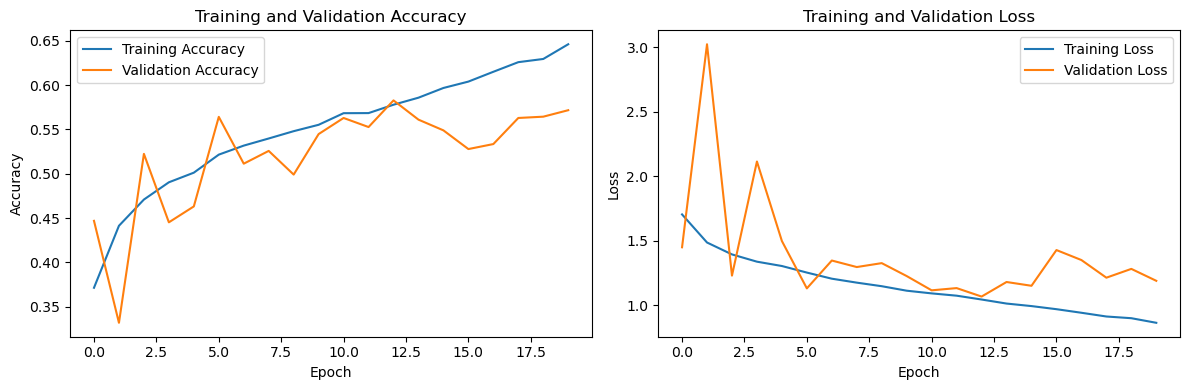

Test Accuracy: 0.5716
Test Loss: 1.1902


In [3]:
import os
import cv2
import numpy as np
from mtcnn import MTCNN
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# --- Preprocessing Code ---
# Define age ranges
age_bins = [(0, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 100)]
age_ranges = [f"{start}-{end}" for start, end in age_bins]
label_map = {range_name: idx for idx, range_name in enumerate(age_ranges)}

# MTCNN face detector
detector = MTCNN()

# Preprocessing function
def preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Failed to load image: {image_path}")
            return None
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = detector.detect_faces(img_rgb)
        if faces:
            x, y, w, h = faces[0]['box']
            x, y = max(0, x), max(0, y)
            face = img_rgb[y:y+h, x:x+w]
            if face.size == 0:
                print(f"Empty face region: {image_path}")
                return None
            face = cv2.resize(face, (64, 64)) / 255.0
            return face
        else:
            print(f"No faces detected: {image_path}")
            return None
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Load UTKFace dataset
utk_dir = r"C:\Users\kunjc\Desktop\New folder\project\UTKface_inthewild"
images = []
labels = []

if not os.path.exists(utk_dir):
    raise FileNotFoundError(f"Directory not found: {utk_dir}")

print(f"Loading images from: {utk_dir}")
file_count = 0

def process_directory(directory):
    global file_count
    for filename in os.listdir(directory):
        full_path = os.path.join(directory, filename)
        if os.path.isdir(full_path):
            process_directory(full_path)
        elif filename.lower().endswith(".jpg"):
            file_count += 1
            try:
                age_parts = filename.split('_')
                if len(age_parts) < 4 or not age_parts[0].isdigit():
                    print(f"Invalid filename format: {filename}")
                    continue
                age = int(age_parts[0])
                for i, (start, end) in enumerate(age_bins):
                    if start <= age <= end:
                        label = label_map[age_ranges[i]]
                        break
                face = preprocess_image(full_path)
                if face is not None:
                    images.append(face)
                    labels.append(label)
            except ValueError as e:
                print(f"Error parsing age from {filename}: {e}")
                continue

process_directory(utk_dir)

print(f"Found {file_count} .jpg files")
print(f"Successfully processed {len(images)} images")

images = np.array(images)
labels = np.array(labels)

if len(images) == 0:
    raise ValueError(f"No images were successfully loaded from {utk_dir}.")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# --- Training Code ---
# Define the CNN model
def create_model(input_shape=(64, 64, 3), num_classes=7):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create and compile the model
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Training parameters
epochs = 20
batch_size = 32

# Train the model
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Save the model
model.save('age_prediction_model.h5')
print("Model saved as 'age_prediction_model.h5'")

# Plot training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,143,751 (4.36 MB)

 Trainable params: 1,143,303 (4.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 66s 104ms/step - accuracy: 0.3190 - loss: 2.0076 - val_accuracy: 0.4223 - val_loss: 1.5120
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 64s 106ms/step - accuracy: 0.3815 - loss: 1.5857 - val_accuracy: 0.4311 - val_loss: 1.6653
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 63s 104ms/step - accuracy: 0.4128 - loss: 1.5132 - val_accuracy: 0.4396 - val_loss: 1.3940
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 66s 110ms/step - accuracy: 0.4165 - loss: 1.4715 - val_accuracy: 0.4154 - val_loss: 1.4028
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 62s 104ms/step - accuracy: 0.4189 - loss: 1.4490 - val_accuracy: 0.4334 - val_loss: 1.4544
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 62s 103ms/step - accuracy: 0.4573 - loss: 1.3871 - val_accuracy: 0.4486 - val_loss: 1.8965
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 63s 104ms/step - accuracy: 0.4781 - loss: 1.3274 - val_accuracy: 0.5272 - val_loss: 1.2174
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 63s 104ms/step - accuracy: 0.4894 - loss: 1

Model saved as 'age_prediction_model_50epochs.h5'


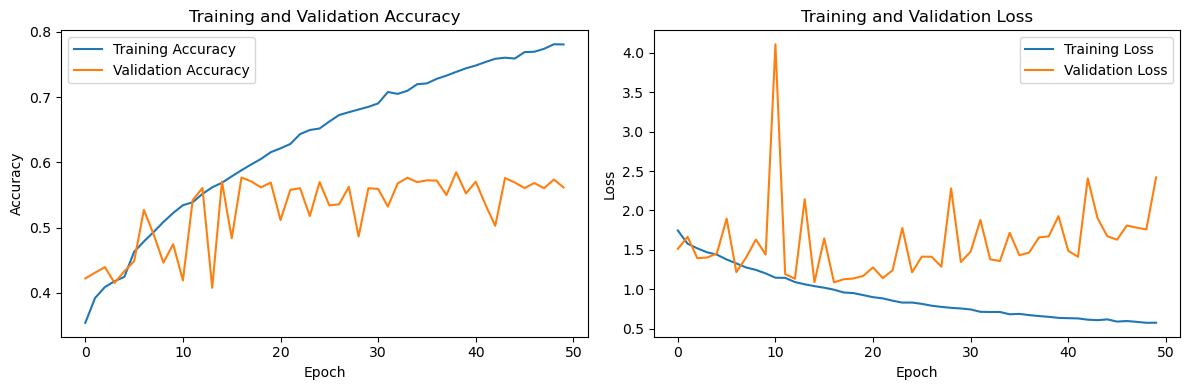

Test Accuracy: 0.5616
Test Loss: 2.4195


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model (updated to use Input layer)
def create_model(input_shape=(64, 64, 3), num_classes=7):
    model = models.Sequential([
        layers.Input(shape=input_shape),  # Explicit input layer to avoid UserWarning
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create and compile the model
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Training parameters
epochs = 50  # Changed from 20 to 50
batch_size = 32

# Train the model (assuming X_train, y_train, X_test, y_test are defined)
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Save the trained model
model.save('age_prediction_model_50epochs.h5')
print("Model saved as 'age_prediction_model_50epochs.h5'")

# Plot training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the results
plot_history(history)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
Predicted age range: 11-20


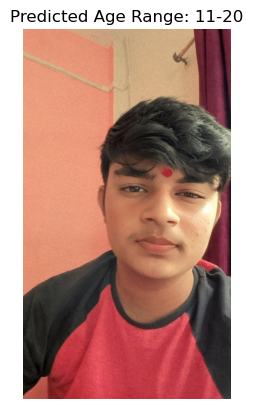

In [1]:
import cv2
import numpy as np
from mtcnn import MTCNN
import tensorflow as tf
import matplotlib.pyplot as plt

# Define age ranges (same as training)
age_bins = [(0, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 100)]
age_ranges = [f"{start}-{end}" for start, end in age_bins]

# Load the trained model
model_path = 'age_prediction_model_50epochs.h5'  # Update this if your model file has a different name
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully!")

# MTCNN face detector (same as preprocessing)
detector = MTCNN()

# Function to preprocess the input image (matches training preprocessing)
def preprocess_image(image_path):
    try:
        # Load the image
        img = cv2.imread(image_path)
        if img is None:
            print(f"Failed to load image: {image_path}")
            return None
        
        # Convert to RGB (since MTCNN expects RGB)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Detect faces
        faces = detector.detect_faces(img_rgb)
        if not faces:
            print(f"No faces detected in: {image_path}")
            return None
        
        # Extract the first face's bounding box
        x, y, w, h = faces[0]['box']
        x, y = max(0, x), max(0, y)  # Ensure non-negative coordinates
        face = img_rgb[y:y+h, x:x+w]
        
        if face.size == 0:
            print(f"Empty face region in: {image_path}")
            return None
        
        # Resize to 64x64 and normalize (same as training)
        face = cv2.resize(face, (64, 64)) / 255.0
        
        # Expand dimensions to match model input (1, 64, 64, 3)
        face = np.expand_dims(face, axis=0)
        return face
    
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Path to your image
your_image_path = r"D:\photo\KuNj\new\Snapchat-1196580186.jpg" # Replace with the actual path to your image

# Preprocess your image
processed_image = preprocess_image(your_image_path)

if processed_image is not None:
    # Make prediction
    prediction = model.predict(processed_image)
    
    # Get the predicted class (index of the highest probability)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Map the class index to the age range
    predicted_age_range = age_ranges[predicted_class]
    
    # Print the result
    print(f"Predicted age range: {predicted_age_range}")
    
    # Optional: Display the image with the prediction
    img = cv2.imread(your_image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Predicted Age Range: {predicted_age_range}")
    plt.axis('off')
    plt.show()
else:
    print("Could not process the image for prediction.")